In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
test_path = "/content/gdrive/MyDrive/skin_cancer_data/Dataset/Test"

train_path="/content/gdrive/MyDrive/skin_cancer_data/Dataset/Train"

In [6]:
import pathlib

In [7]:
train_dir = pathlib.Path(train_path)
test_dir = pathlib.Path(test_path)

In [ ]:
# Taking the count of image in test and train directories

In [8]:
train_count = len(list(train_dir.glob('*/*.jpg')))
train_count

2239

In [9]:
test_count = len(list(test_dir.glob('*/*.jpg')))
test_count

118

In [8]:
#Load using keras.preprocessing
#let's load these images off disk using the helpful image_dataset_from_directory

#Create a dataset
#Define some parameters for the loader:

In [10]:
image_rows, image_cols = 180,180
batch_size = 32

In [11]:
# Define the parameters for the dataset loading
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,                 # Path to training data
    seed=123,                  # Seed for shuffling data
    validation_split=0.2,      # 20% of the data for validation
    subset='training',         # Load the training subset
    image_size=(image_rows, image_cols),  # Resize images to the given dimensions
    batch_size=batch_size,     # Number of images to process in a batch
    color_mode='rgb'           # Load the images in RGB format
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [12]:
# Load the validation dataset from the directory
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,                 # Path to the dataset (same as training since it's split internally)
    seed=123,                  # Seed for ensuring consistent split
    validation_split=0.2,      # Use 20% of the data for validation
    subset='validation',       # Specify that this is the validation subset
    image_size=(image_rows, image_cols),  # Resize the images to the specified dimensions
    batch_size=batch_size,     # Process images in batches
    color_mode='rgb'           # Load the images as RGB (color images)
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [13]:
class_names = train_ds.class_names
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [14]:
class_names=['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [15]:
# Get the file path of the first image in the specified class
image_path = list(train_dir.glob(f'{class_names[2]}/*.jpg'))[0]

# Read the image using matplotlib
image = plt.imread(image_path)

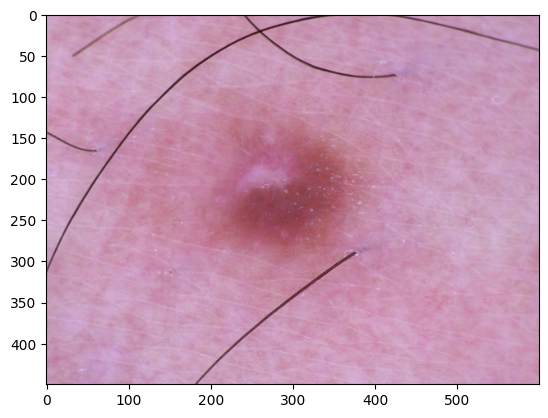

In [16]:
plt.imshow(image)

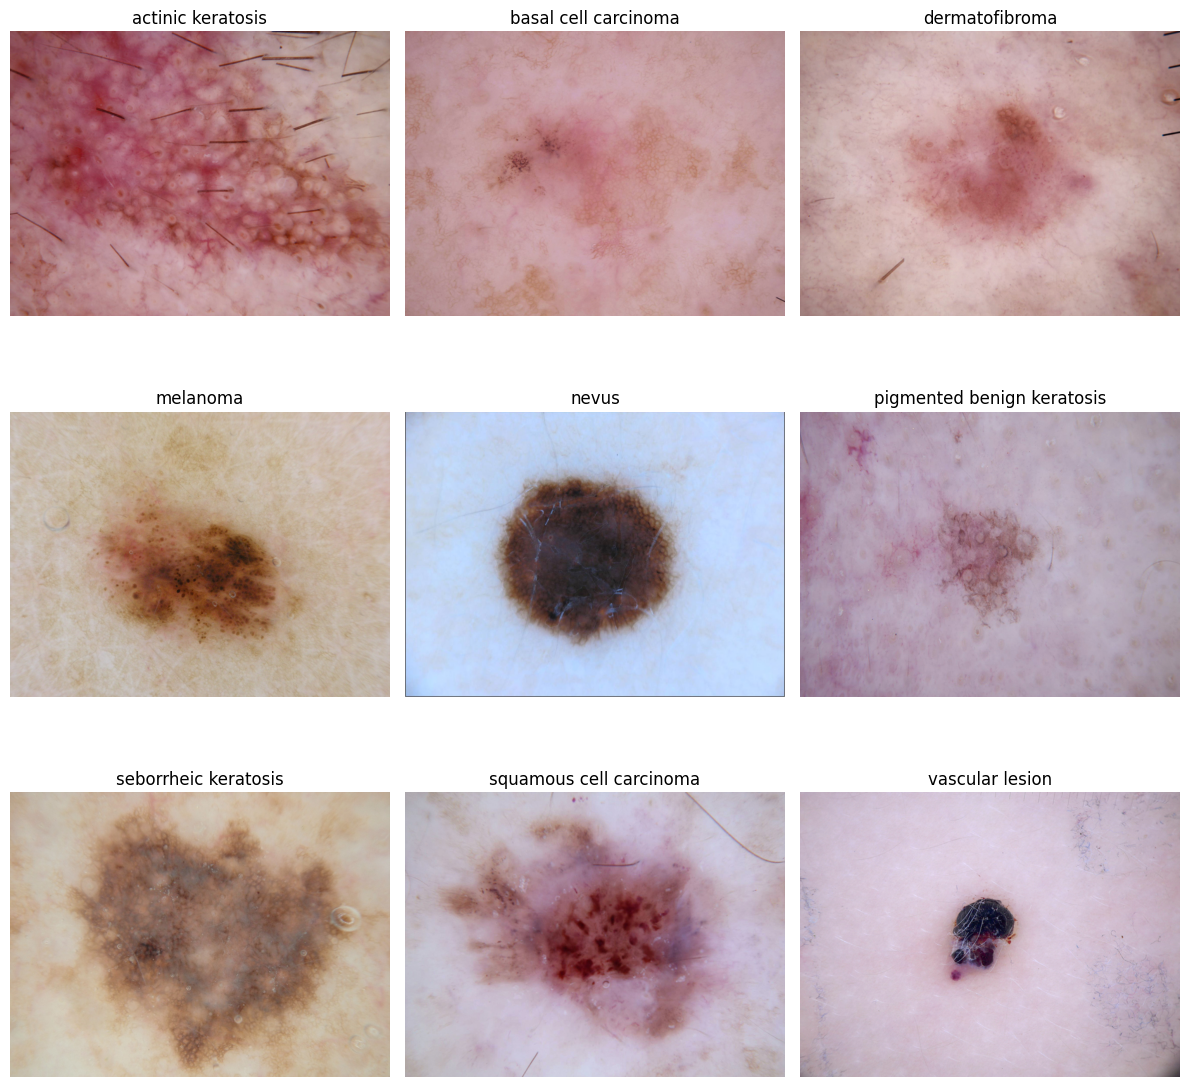

In [17]:
# Set up a figure with a 3x3 grid
plt.figure(figsize=(12, 12))

# Loop through the first 9 classes
for i in range(9):
    # Create a subplot for each class
    plt.subplot(3, 3, i + 1)

    # Get the path of the second image from each class folder
    image_path = str(list(train_dir.glob(f'{class_names[i]}/*.jpg'))[1])

    # Read the image using matplotlib
    image = plt.imread(image_path)

    # Display the image with the class name as the title
    plt.imshow(image)
    plt.title(class_names[i])
    plt.axis('off')  # Turn off axes for better visual representation

# Show the plot
plt.tight_layout()
plt.show()

In [18]:
import os
import PIL

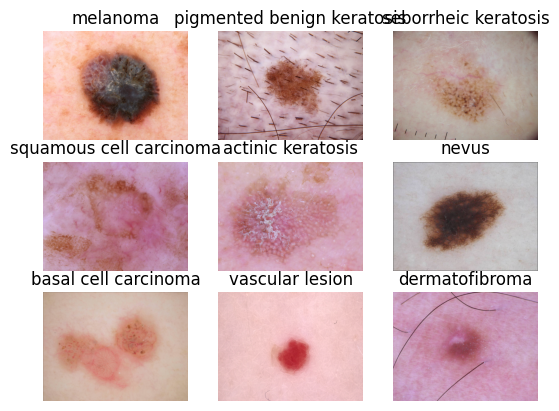

In [19]:
# Initialize a counter for the subplot
num = 0

# Iterate through the directories and files
for dirpath, _, filenames in os.walk(str(train_path)):

    # Filter the filenames to only include the first .jpg file in each directory
    jpg_files = [f for f in filenames if f.endswith(".jpg")][:1]

    for filename in jpg_files:
        # Construct the full image path
        img_path = os.path.join(dirpath, filename)

        # Open the image using PIL
        img = PIL.Image.open(img_path)

        # Create a subplot for each image
        plt.subplot(3, 3, num + 1)

        # Set the title as the directory name (last part of the path)
        plt.title(os.path.basename(dirpath))

        # Hide the axes for better visualization
        plt.axis('off')

        # Display the image
        plt.imshow(img)

        # Increment the counter for subplots
        num += 1

In [20]:
# Enable data caching, shuffling, and prefetching for training dataset
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = (train_ds
            .cache()              # Cache the dataset to improve performance
            .shuffle(buffer_size=1000)  # Shuffle the dataset with a buffer size of 1000
            .prefetch(buffer_size=AUTOTUNE))  # Prefetch to optimize pipeline

# Cache and prefetch the validation dataset
val_ds = (val_ds
          .cache()                # Cache the validation dataset
          .prefetch(buffer_size=AUTOTUNE))  # Prefetch for performance optimization

In [ ]:
#Model Building

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
import tensorflow as tf

model = Sequential([
    tf.keras.layers.Rescaling(1/255, input_shape=(image_rows, image_cols, 3))
])

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(9, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Compile Model

In [22]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Compile the model
model.compile(
    optimizer=Adam(),  # Specify optimizer
    loss=SparseCategoricalCrossentropy(from_logits=True),  # Specify loss function
    metrics=['accuracy']  # Specify metrics
)

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 180, 180, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 90, 90, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 22, 22, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         991,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,067,337 (4.07 MB)

 Trainable params: 1,067,337 (4.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Training Model

In [24]:
epochs= 20
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=epochs,
                    )

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 ━━━━━━━━━━━━━━━━━━━━ 449s 4s/step - accuracy: 0.1618 - loss: 2.1605 - val_accuracy: 0.2058 - val_loss: 2.0723
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 273s 4s/step - accuracy: 0.2214 - loss: 2.0045 - val_accuracy: 0.3132 - val_loss: 1.9013
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 209s 4s/step - accuracy: 0.3580 - loss: 1.8212 - val_accuracy: 0.3333 - val_loss: 1.8444
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 210s 4s/step - accuracy: 0.4138 - loss: 1.6753 - val_accuracy: 0.4340 - val_loss: 1.6060
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 214s 4s/step - accuracy: 0.4027 - loss: 1.6008 - val_accuracy: 0.3758 - val_loss: 1.7890
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 217s 4s/step - accuracy: 0.3720 - loss: 1.6794 - val_accuracy: 0.4318 - val_loss: 1.5780
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 211s 4s/step - accuracy: 0.4732 - loss: 1.5174 - val_accuracy: 0.4452 - val_loss: 1.5063
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 220s 4s/step - accuracy: 0.5010 - loss: 1.4214 - val_accuracy: 0.4653 - val_loss: 1.

In [ ]:
# Visualising Results

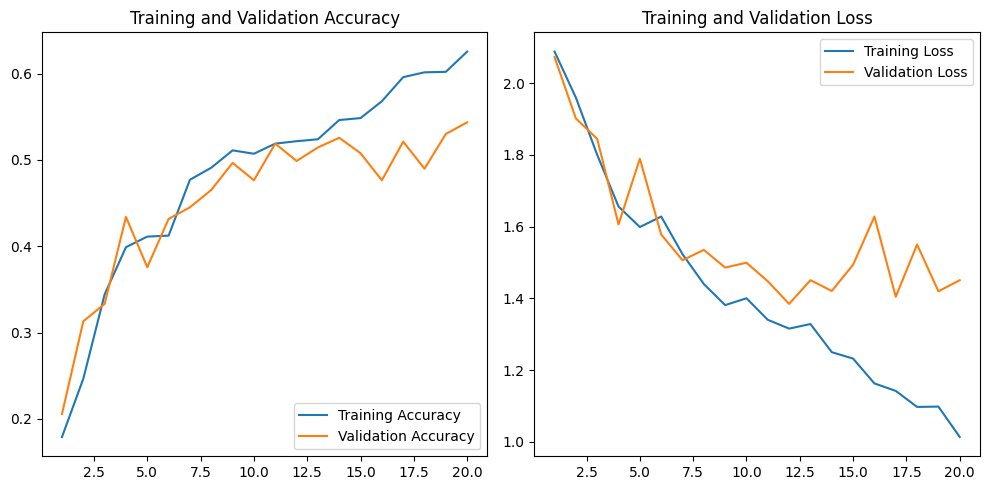

In [25]:
# Unpack history data
acc = history.history.get('accuracy', [])
val_acc = history.history.get('val_accuracy', [])
loss = history.history.get('loss', [])
val_loss = history.history.get('val_loss', [])

# Define range for epochs
epochs_range = range(1, len(acc) + 1)

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot training and validation accuracy
ax1.plot(epochs_range, acc, label='Training Accuracy')
ax1.plot(epochs_range, val_acc, label='Validation Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.legend(loc='lower right')

# Plot training and validation loss
ax2.plot(epochs_range, loss, label='Training Loss')
ax2.plot(epochs_range, val_loss, label='Validation Loss')
ax2.set_title('Training and Validation Loss')
ax2.legend(loc='upper right')

# Display plots
plt.tight_layout()
plt.show()

In [ ]:
#Key Observations

#The accuracy differences are 69% for training and 51% for validation.

#The accuracy of validation is significantly lower than that of training.

#The obvious instance of overfitting the model is demonstrated by the disparity in training and validation accuracy.

#As the number of epochs rises, so does the training accuracy.

#The validation accuracy exhibits stability and declines as the number of epochs increases.

#Up to around 10 epochs, the training loss is followed by the validation loss; beyond that, the training loss falls off and the validation loss rises.

In [26]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [27]:
# Count the number of images in each class
for class_name in class_names:
    image_count = len(list(train_dir.glob(f'{class_name}/*.jpg')))
    print(f"{class_name}: {image_count}")

actinic keratosis: 114
basal cell carcinoma: 376
dermatofibroma: 95
melanoma: 438
nevus: 357
pigmented benign keratosis: 462
seborrheic keratosis: 77
squamous cell carcinoma: 181
vascular lesion: 139


In [28]:
# Count the number of images in each class
for i, class_name in enumerate(class_names):
    image_count = len(list(test_dir.glob(f'{class_name}/*.jpg')))
    print(f"{class_name}: {image_count}")

actinic keratosis: 16
basal cell carcinoma: 16
dermatofibroma: 16
melanoma: 16
nevus: 16
pigmented benign keratosis: 16
seborrheic keratosis: 3
squamous cell carcinoma: 16
vascular lesion: 3


In [ ]:
#Problem Identification:

#Unequal dataset: There is an unequal distribution of images in the training dataset.

#Keratosis seborrhoeic: 77 ,Actinic keratosis: 114 ,vascular lesion: 139 ,squamous cell carcinoma: 181

#Compared to the other situations, the samples in the aforementioned cases are extremely small. Thus, in every instance, we must increase the sample size.

#Here, augmentor and data augmentation are used.

In [29]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip(mode="horizontal_and_vertical"),
    layers.RandomRotation(factor=0.2)
])

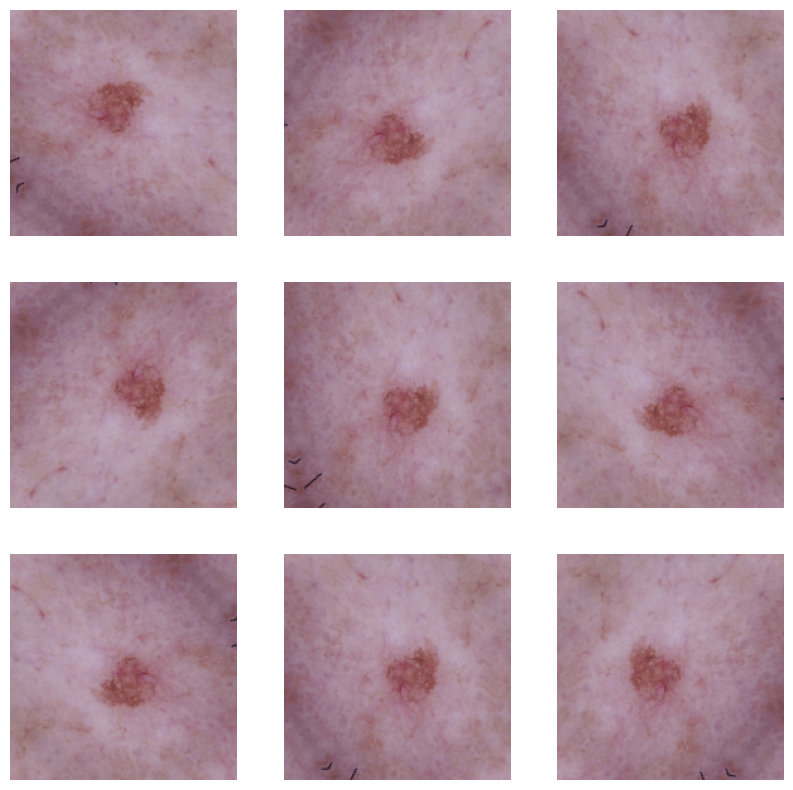

In [30]:
# Get a batch of images and labels from the dataset
image_batch, label_batch = next(iter(train_ds))

# Convert the images to integer arrays
image_batch = image_batch.numpy().astype(np.int32)

# Plot augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    # Apply data augmentation
    augmented_image = data_augmentation(image_batch)

    # Select the first image in the batch and convert to integer
    augmented_image_single = augmented_image[0].numpy().astype(np.int32)

    # Plot the image
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image_single)
    plt.axis("off")

plt.show()

In [ ]:
Model with Data Augumentation

In [31]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

# Define the model
model = Sequential([
    # Data augmentation and rescaling layers
    data_augmentation,
    layers.Rescaling(1/255, input_shape=(image_rows, image_cols, 3)),

    # First set of convolutional layers
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.2),

    # Second set of convolutional layers
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.2),

    # Third set of convolutional layers
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.2),

    # Fourth set of convolutional layers
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.2),

    # Flatten the output and add dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),

    # Output layer with 9 classes (softmax activation)
    Dense(9, activation='softmax')
])

In [32]:
# Compile the model
model.compile(
    optimizer=Adam(),  # Using Adam optimizer
    loss=SparseCategoricalCrossentropy(from_logits=True),  # SparseCategoricalCrossentropy loss function
    metrics=['accuracy']  # Accuracy metric
)

In [33]:
# Define training parameters
epochs = 20
batch_size = 32

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1  # Verbose logging
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 223s 4s/step - accuracy: 0.1943 - loss: 2.1277 - val_accuracy: 0.1924 - val_loss: 2.0715
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 259s 4s/step - accuracy: 0.2136 - loss: 2.0115 - val_accuracy: 0.2595 - val_loss: 1.9659
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 216s 4s/step - accuracy: 0.2812 - loss: 1.9011 - val_accuracy: 0.3423 - val_loss: 1.8566
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 218s 4s/step - accuracy: 0.3709 - loss: 1.7261 - val_accuracy: 0.4116 - val_loss: 1.5885
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 260s 4s/step - accuracy: 0.3918 - loss: 1.6794 - val_accuracy: 0.4362 - val_loss: 1.6356
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 214s 4s/step - accuracy: 0.4219 - loss: 1.6230 - val_accuracy: 0.3199 - val_loss: 1.8303
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 213s 4s/step - accuracy: 0.4210 - loss: 1.6271 - val_accuracy: 0.4452 - val_loss: 1.5753
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 264s 4s/step - accuracy: 0.4527 - loss: 1.5543 - val_accuracy: 0.4430 - v

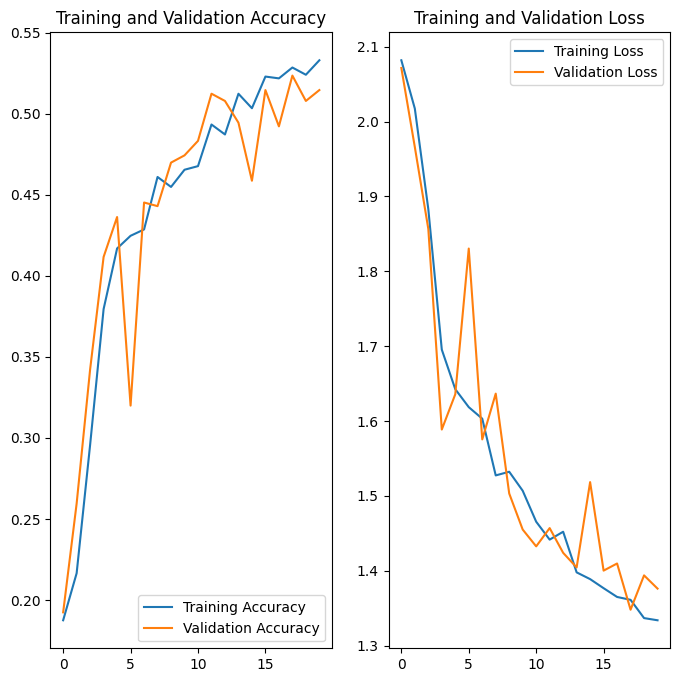

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Important Observations

#There is about comparable accuracy in both training and validation. They adhere to comparable patterns. Despite this, the 52% training accuracy and 53% validation accuracy have dropped. Data augmentation has been used to alleviate the overfitting issue since both accuracies nearly follow one another.

#However, there is a need to address the lower accuracy.

In [ ]:
Checking for class imbalance

In [35]:
# Get the number of images in each class
image_counts = [(name, len(list(train_dir.glob(f'{name}/*.jpg')))) for name in class_names]

# Print the results
for name, number in image_counts:
    print(f'{name}: {number}')

actinic keratosis: 114
basal cell carcinoma: 376
dermatofibroma: 95
melanoma: 438
nevus: 357
pigmented benign keratosis: 462
seborrheic keratosis: 77
squamous cell carcinoma: 181
vascular lesion: 139


In [ ]:
#Uneven dataset: The training dataset the distribution of image are uneven.

#seborrheic keratosis:77
#squamous cell carcinoma:181
#vascular lesion:139
#actinic keratosis:114
#The samples in above cases are very less in comparison to the other cases. So we need to increase the samples in each case.

In [ ]:
Augmentor for addressing class imbalance problem

In [36]:
!pip install Augmentor

In [37]:
import Augmentor

In [38]:
train_path

'/content/gdrive/MyDrive/skin_cancer_data/Dataset/Train'

In [39]:
for i in class_names:
  print(train_path+i)

/content/gdrive/MyDrive/skin_cancer_data/Dataset/Trainactinic keratosis
/content/gdrive/MyDrive/skin_cancer_data/Dataset/Trainbasal cell carcinoma
/content/gdrive/MyDrive/skin_cancer_data/Dataset/Traindermatofibroma
/content/gdrive/MyDrive/skin_cancer_data/Dataset/Trainmelanoma
/content/gdrive/MyDrive/skin_cancer_data/Dataset/Trainnevus
/content/gdrive/MyDrive/skin_cancer_data/Dataset/Trainpigmented benign keratosis
/content/gdrive/MyDrive/skin_cancer_data/Dataset/Trainseborrheic keratosis
/content/gdrive/MyDrive/skin_cancer_data/Dataset/Trainsquamous cell carcinoma
/content/gdrive/MyDrive/skin_cancer_data/Dataset/Trainvascular lesion


In [40]:
path_to_training_dataset = train_path

def augment_images_for_class(class_name, dataset_path, num_samples=500):
    pipeline = Augmentor.Pipeline(f'{dataset_path}/{class_name}')
    pipeline.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    pipeline.sample(num_samples)

for class_name in class_names:
    augment_images_for_class(class_name, path_to_training_dataset)

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/skin_cancer_data/Dataset/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EE4B2A7B700>: 100%|██████████| 500/500 [00:25<00:00, 19.80 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/skin_cancer_data/Dataset/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EE4B2CFA3B0>: 100%|██████████| 500/500 [00:23<00:00, 21.03 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/skin_cancer_data/Dataset/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EE4B2972A70>: 100%|██████████| 500/500 [00:25<00:00, 19.80 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/skin_cancer_data/Dataset/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7EE4B2D99D50>: 100%|██████████| 500/500 [01:49<00:00,  4.57 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/skin_cancer_data/Dataset/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=960x645 at 0x7EE4B2A9EF20>: 100%|██████████| 500/500 [01:30<00:00,  5.56 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/skin_cancer_data/Dataset/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EE4B2F6FC10>: 100%|██████████| 500/500 [00:24<00:00, 20.26 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/skin_cancer_data/Dataset/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7EE4B2D74460>: 100%|██████████| 500/500 [00:50<00:00,  9.95 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/skin_cancer_data/Dataset/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7EE4B29708E0>: 100%|██████████| 500/500 [00:24<00:00, 20.73 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/skin_cancer_data/Dataset/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7EE4B29344F0>: 100%|██████████| 500/500 [00:25<00:00, 19.93 Samples/s]


In [41]:
from glob import glob

In [42]:
path_list = [x for x in glob(os.path.join(train_dir, '*','output', '*.jpg'))]

In [43]:
len(path_list)

4500

In [44]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(train_dir, '*','output', '*.jpg'))]

In [45]:
len(lesion_list_new)

4500

In [46]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [47]:
len(dataframe_dict_new )

4500

In [48]:
class_names[0]

'actinic keratosis'

In [50]:
for i in class_names:
    directory =train_path
    directory_out =train_path+'/'+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob(i+'/*.jpg')))
    length_out=len(list(class_directory_out.glob('*.jpg')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} samples.')

actinic keratosis has 614 samples.
basal cell carcinoma has 876 samples.
dermatofibroma has 595 samples.
melanoma has 938 samples.
nevus has 857 samples.
pigmented benign keratosis has 962 samples.
seborrheic keratosis has 577 samples.
squamous cell carcinoma has 681 samples.
vascular lesion has 639 samples.


In [ ]:
The augmentor has increased the number of samples by 500 in each of the classes. This make the difference in ratio less and between each each class.

In [ ]:
Model with Augmented Data

In [51]:
img_height = 180
img_width = 180

In [52]:
data_dir_train = train_path

# Define the parameters for the dataset
dataset_params = {
    'directory': data_dir_train,
    'seed': 123,
    'label_mode': 'categorical',
    'validation_split': 0.2,
    'subset': 'training',
    'image_size': (img_height, img_width),
    'batch_size': batch_size
}

# Create the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(**dataset_params)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [53]:
data_dir_train = train_path

# Define the parameters for the dataset
validation_dataset_params = {
    'directory': data_dir_train,
    'seed': 123,
    'label_mode': 'categorical',
    'validation_split': 0.2,
    'subset': 'validation',
    'image_size': (img_height, img_width),
    'batch_size': batch_size
}

# Create the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(**validation_dataset_params)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [57]:
from tensorflow.keras import layers, models

# Define the input layer and rescaling
inputs = tf.keras.Input(shape=(image_rows, image_cols, 3))
x = layers.Rescaling(1/255)(inputs)

# First block of Conv2D, MaxPooling, and Dropout
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.2)(x)

# Second block of Conv2D, MaxPooling, and Dropout
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.2)(x)

# Third block of Conv2D, MaxPooling, and Dropout
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.2)(x)

# Fourth block of Conv2D, MaxPooling, and Dropout
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.2)(x)

# Flatten and fully connected layers
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Output layer with softmax activation
outputs = layers.Dense(9, activation='softmax')(x)

# Build the model
model = models.Model(inputs=inputs, outputs=outputs)

In [58]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
history = model.fit(train_ds,
          validation_data= val_ds,
          epochs=25)

Epoch 1/25
169/169 ━━━━━━━━━━━━━━━━━━━━ 662s 4s/step - accuracy: 0.1368 - loss: 2.1916 - val_accuracy: 0.2851 - val_loss: 1.9342
Epoch 2/25
169/169 ━━━━━━━━━━━━━━━━━━━━ 689s 4s/step - accuracy: 0.2783 - loss: 1.8647 - val_accuracy: 0.3898 - val_loss: 1.6521
Epoch 3/25
169/169 ━━━━━━━━━━━━━━━━━━━━ 679s 4s/step - accuracy: 0.3795 - loss: 1.6176 - val_accuracy: 0.4261 - val_loss: 1.5230
Epoch 4/25
169/169 ━━━━━━━━━━━━━━━━━━━━ 670s 4s/step - accuracy: 0.4200 - loss: 1.4872 - val_accuracy: 0.4736 - val_loss: 1.3317
Epoch 5/25
169/169 ━━━━━━━━━━━━━━━━━━━━ 685s 4s/step - accuracy: 0.4846 - loss: 1.3557 - val_accuracy: 0.5078 - val_loss: 1.3258
Epoch 6/25
169/169 ━━━━━━━━━━━━━━━━━━━━ 659s 4s/step - accuracy: 0.5083 - loss: 1.2488 - val_accuracy: 0.4922 - val_loss: 1.3087
Epoch 7/25
169/169 ━━━━━━━━━━━━━━━━━━━━ 685s 4s/step - accuracy: 0.5654 - loss: 1.1482 - val_accuracy: 0.5924 - val_loss: 1.0901
Epoch 8/25
169/169 ━━━━━━━━━━━━━━━━━━━━ 676s 4s/step - accuracy: 0.6003 - loss: 1.0312 - val_accu

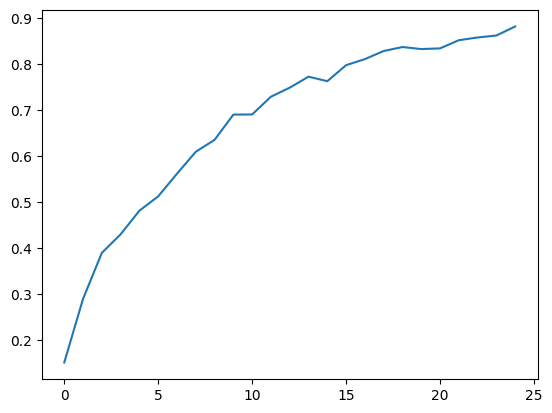

In [60]:
epochs=25
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range =range(epochs)
plt.plot(epochs_range, acc, label='Training Accuracy')

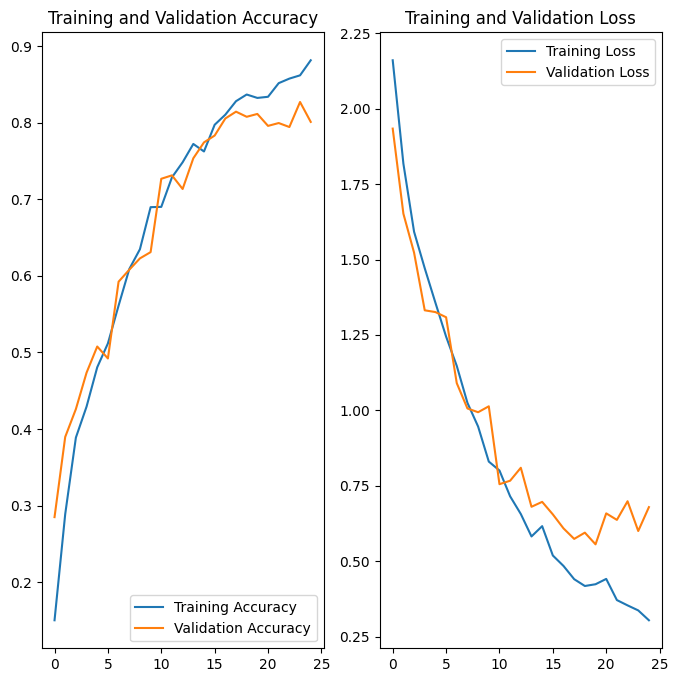

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=25
epochs_range =range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#In summary

#90% of the test set is accurate.

#The validation dats set's accuracy is 80%.

#In order to see if the model improves, we tried a few more epochs. However, as we include more epochs, the model actually tends to get more overfit.

#When we have training data that is balanced across classes, the model with the aforementioned accuracy performs better.

#The model's performance on the additional data indicates this.